## Randomly Sierpinski

This example is based on a [blog post from John D. Cook](https://www.johndcook.com/blog/2017/07/08/the-chaos-game-and-the-sierpinski-triangle/).

I couldn't resist writing a version in a more NumPy-ish style.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def midpoint(*args):
    return np.mean(args, axis=0)

In [3]:
# Three corners of an equilateral triangle
corner = np.array([(0, 0), (0.5, np.sqrt(3)/2), (1, 0)])
corner[1]

array([0.5      , 0.8660254])

In [4]:
N = 1000
p = np.zeros((N, 2))

In [5]:
p[0] = midpoint(corner[0], corner[1])
p[0]

array([0.25     , 0.4330127])

In [6]:
ks = np.random.choice(3, 1000)

In [7]:
for i, k in enumerate(ks):
    p[i] = midpoint(p[i-1], corner[k])

In [8]:
xs, ys = np.transpose(p)

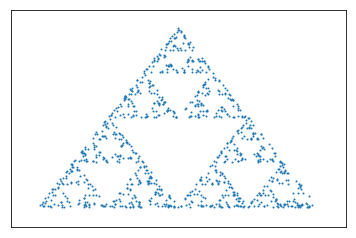

In [9]:
plt.scatter(xs, ys, s=1)
plt.axis([-0.1, 1.1, -0.1, 0.95])
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
points_per_step = 10
steps = len(p) // points_per_step

In [11]:
%%capture
fig, ax = plt.subplots()
ax.axis([-0.1, 1.1, -0.1, 1.1])
plt.xticks([])
plt.yticks([])
scatter = ax.scatter([],[], s=2)

def animate(i):
    scatter.set_offsets(p[:i*points_per_step])

from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, animate, frames=steps)

In [12]:
from IPython.display import HTML
HTML(anim.to_jshtml())